## The Sparks Foundation GRIP Task 4
## Exploratory Data Analysis (Terrorism)
## Name : Paras Rawat

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read the dataset
df=pd.read_csv('globalterrorismdb_0718dist.csv')

D:\Paras\SparksFoundation\env\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

<AxesSubplot:>

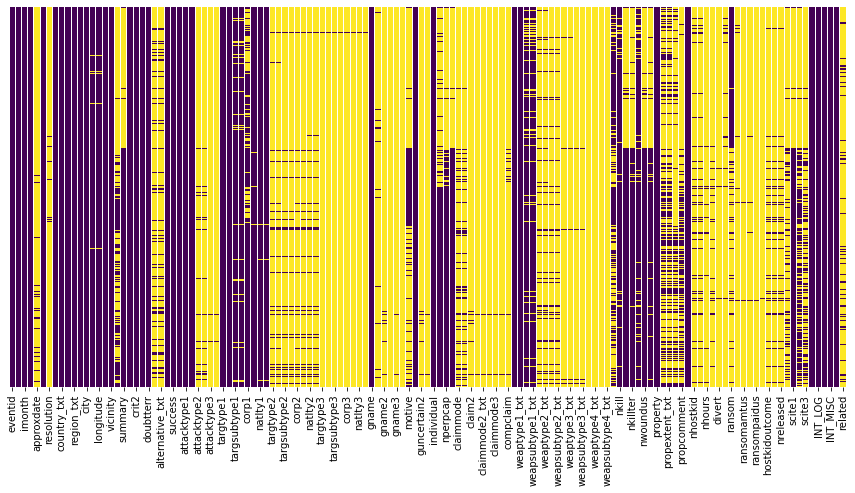

In [7]:
#check NaN values

plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df2=pd.DataFrame()

In [9]:
for i in df.columns:
    if df[i].isna().sum()< 10000:
        df2[i]=df[i]

In [10]:
df2.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,individual,weaptype1,weaptype1_txt,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0,13,Unknown,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0,13,Unknown,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,13,Unknown,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0,6,Explosives,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0,8,Incendiary,1,0.0,PGIS,-9,-9,1,1


In [11]:
df2.dropna(inplace=True)

<AxesSubplot:>

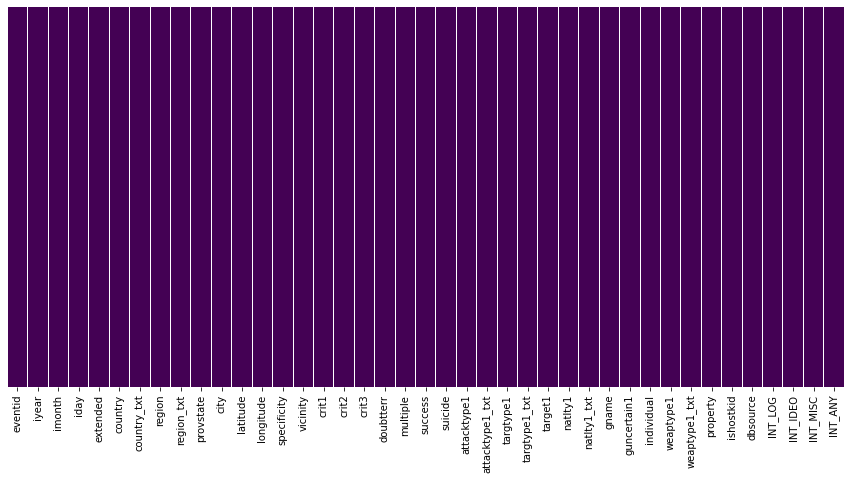

In [12]:
#check NaN values
plt.figure(figsize=(15,7))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
len(df2)

173732

In [14]:
df2.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'ishostkid', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [15]:
# Total countries affected by Terrorism
df2['country_txt'].nunique()

204

In [16]:
df2['iyear'].nunique()

47

The World has been suffering with Terrorism for the past 47 years

In [30]:
x=df2['iyear'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 years with most Terrorist Attacks')

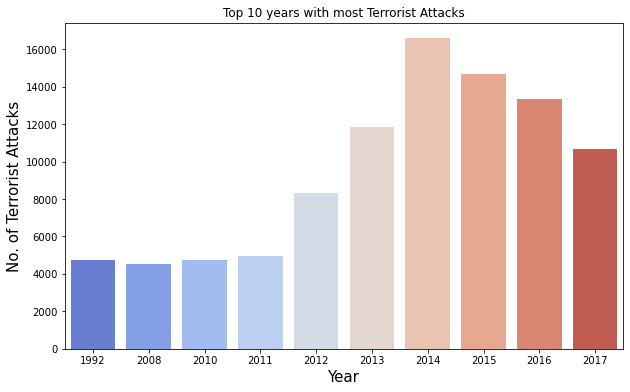

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=x.index,y=x.values,palette='coolwarm')
plt.xlabel('Year',fontsize=15)
plt.ylabel('No. of Terrorist Attacks',fontsize=15)
plt.title('Top 10 years with most Terrorist Attacks')

### Feature Extraction

In [19]:
def month(x):
    month_list =['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
    if x==0:
        return None
    else:
        return month_list[x-1]
df2['month']=df2['imonth'].apply(lambda x:month(x))
df2.drop('imonth',axis=1,inplace=True)

In [20]:
df2['month'].value_counts()

May     16071
July    15606
Aug     15125
Oct     14893
June    14726
Mar     14539
Apr     14505
Nov     14315
Jan     14223
Sept    13541
Feb     13264
Dec     12909
Name: month, dtype: int64

Text(0.5, 1.0, 'Terrorist Attack wrt Months')

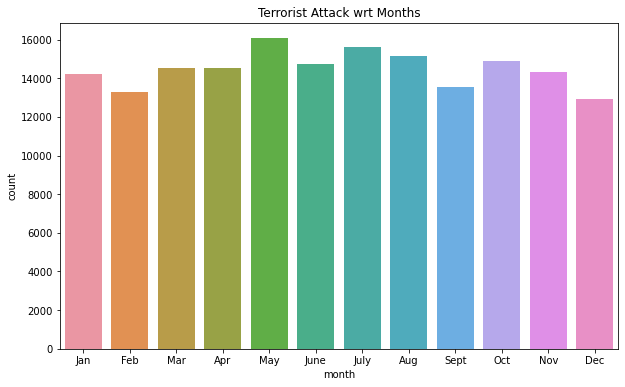

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',data=df2)
plt.title('Terrorist Attack wrt Months')

In [22]:
x=pd.DataFrame(df2.groupby([df2['month'],df2['iyear']==2014]).count()['eventid'])

In [23]:
x.reset_index(inplace=True)
x.query('iyear',inplace=True)

Text(0.5, 1.0, 'Terroist Attacks in 2014')

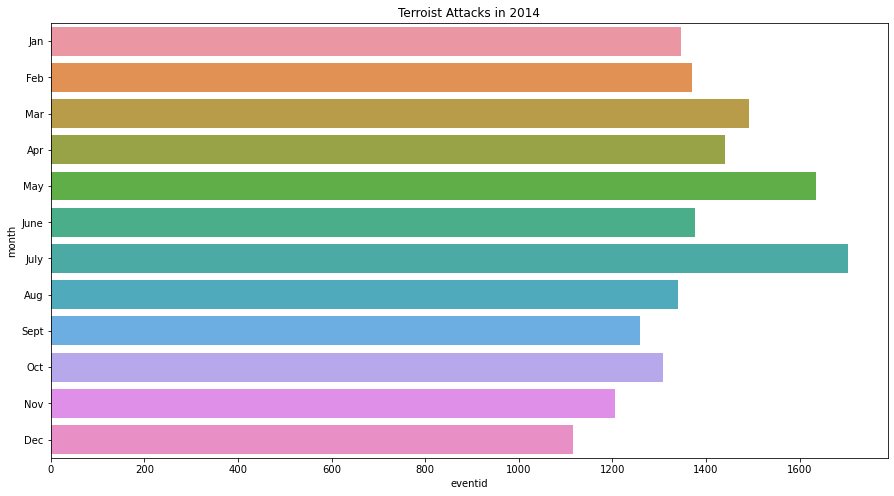

In [24]:
plt.figure(figsize=(15,8))
month_list = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
sns.barplot(y='month',x='eventid',data=x,order=month_list)
plt.title('Terroist Attacks in 2014')

In [25]:
success=df2.groupby('iyear').sum()['success']

In [26]:
x=df2.groupby('iyear').count()['success']

In [27]:
success_percentage = (success/x)*100

In [45]:
x=success_percentage.sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 years with highest Terrorist Attacks Success Rate')

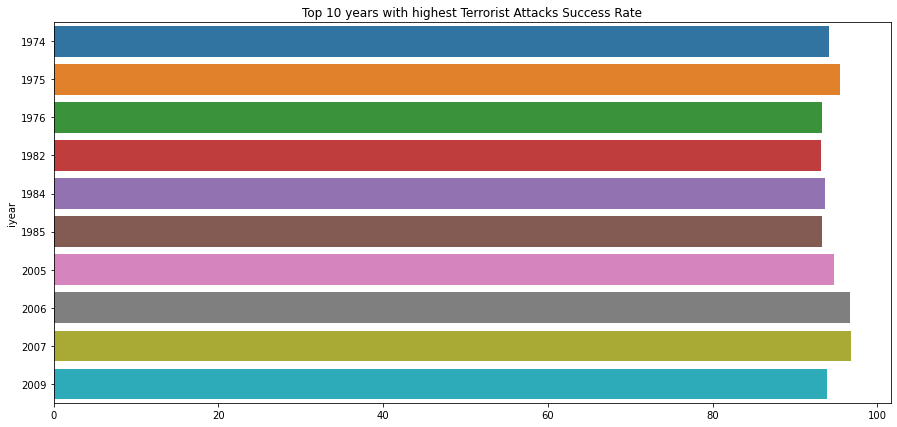

In [59]:
plt.figure(figsize=(15,7))
sns.barplot(y=x.index,x=x.values,orient='h')
plt.title('Top 10 years with highest Terrorist Attacks Success Rate')

In [101]:
y=df2['country_txt'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Countries with most Terrorist Attacks')

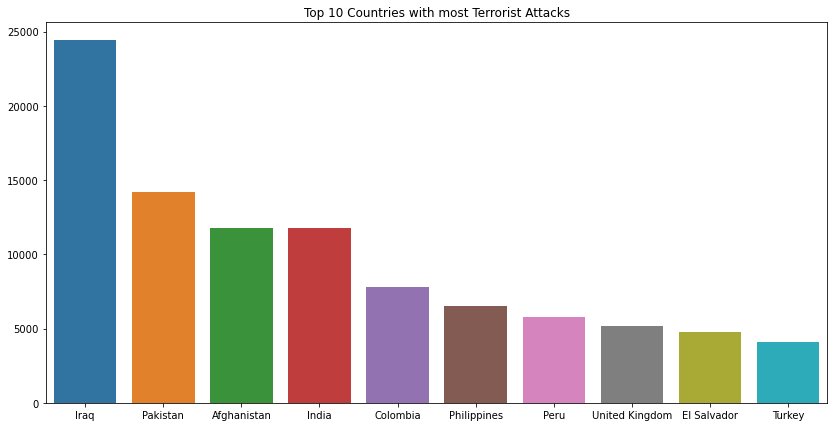

In [113]:
plt.figure(figsize=(14,7))
sns.barplot(x=y.index,y=y.values)
plt.title('Top 10 Countries with most Terrorist Attacks')

Text(0.5, 1.0, 'Method of Terrorist Attacks')

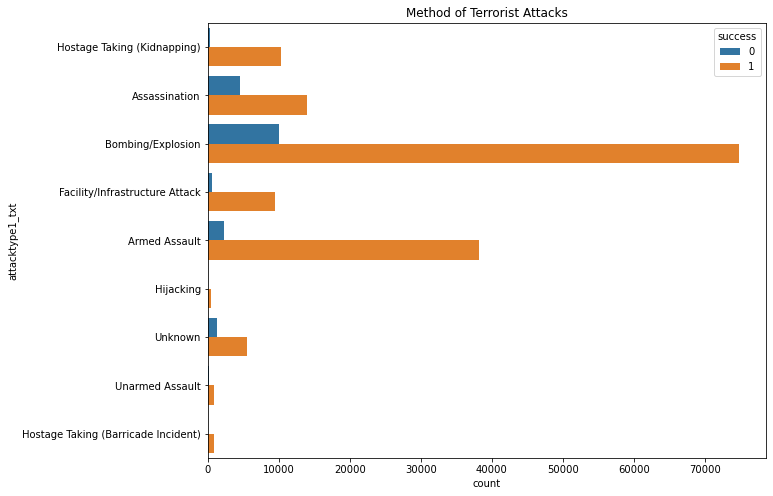

In [129]:
plt.figure(figsize=(10,8))
sns.countplot(y='attacktype1_txt',data=df2,orient='h',hue='success')
plt.title('Method of Terrorist Attacks')

In [122]:
df2.columns

Index(['eventid', 'iyear', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY', 'month'],
      dtype='object')

Text(0.5, 1.0, 'Targets of Terrorist Attacks')

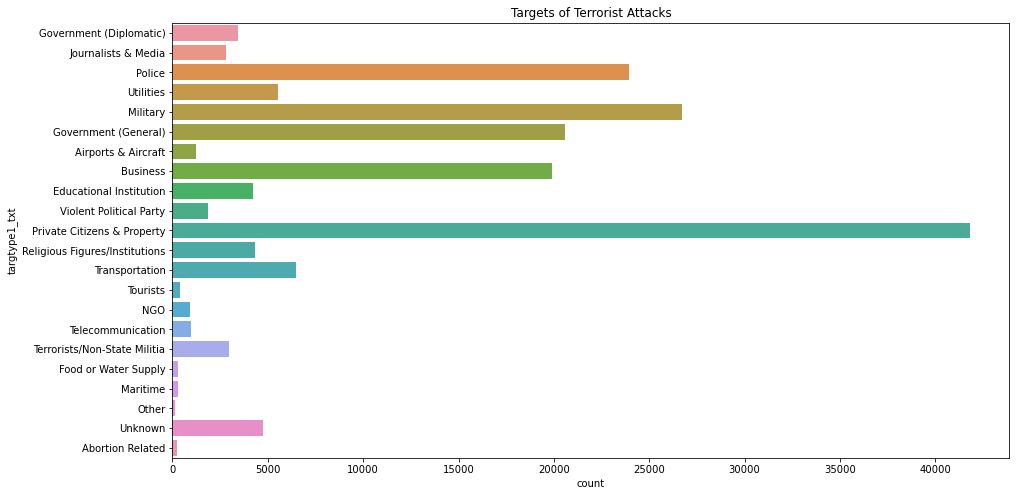

In [128]:
plt.figure(figsize=(15,8))
sns.countplot(y='targtype1_txt',data=df2)
plt.title('Targets of Terrorist Attacks')

In [140]:
df2['target1'].nunique()

82856

Text(0.5, 1.0, 'Top 10 Targets of Terroist Attacks')

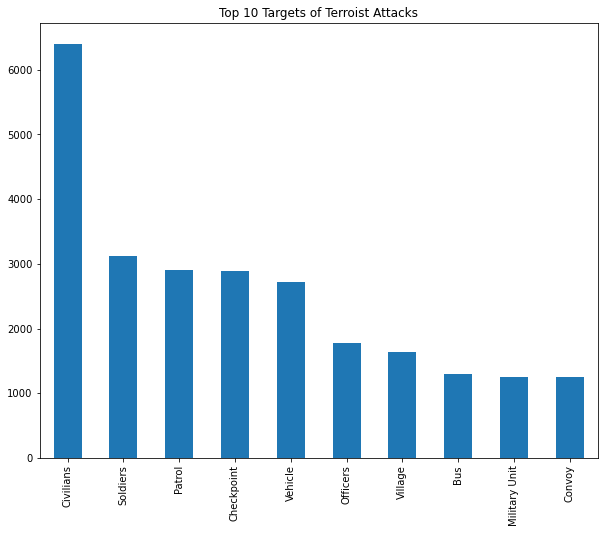

In [147]:
plt.figure(figsize=(10,8))
df2['target1'].value_counts().head(11).drop('Unknown').plot(kind='bar')
plt.title('Top 10 Targets of Terroist Attacks')

In [168]:
x=df2['weaptype1_txt'].value_counts().head()

Text(0.5, 1.0, 'Top Five Weapon Used In Terrorist Attacks')

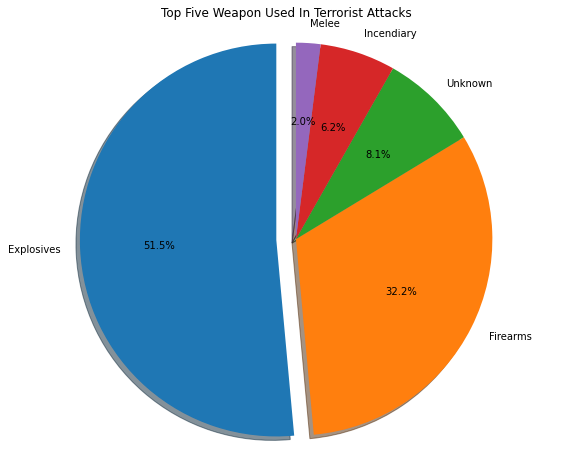

In [170]:
fig ,ax1=plt.subplots(figsize=(10,8))
sizes=x.values
explode=(0.1,0,0,0,0)
labels=x.index
y=ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
z=ax1.axis('equal')
plt.title("Top Five Weapon Used In Terrorist Attacks")

**INSIGHTS**

<h3>1) The Hot Zone for terrorist attacks are Iraq, Pakistan, and Afganistan.<br>
2) The terrorist groups were most active in the Year of 2014.<br>
3) The highest success rate of terrorist attacks was in year 2007.<br>
4) The most common method used by terrorist groups was Explosion/Bombing and Armed Asault.<br>
5) Civilians, Military, and Police were the most common targets of the terrorist groups.<br>

## Thank You